Since our dataset is imbalanced we have to overcome this issue to obtain accurate results.
There are 3 solutions to make our classes balanced:
- oversample the dataset
- undersample the dataset
- combine minority classes to one class

In this project we combine minority classes to one class.  Therefore we end of having 2 classes [0, 1] 
- 0: not having diabetes 
- 1: having diabetes

The reason we do that is that the machine learning classifier tends to be more biased towards the majority class, causing bad classification of the minority class.



## import libraries

In [1]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

## load dataset

In [2]:
path_to_dataset = 'data/diabetes_data.csv'
# load csv file to dataframe
dataframe = pd.read_csv(path_to_dataset)

In [3]:
# make a copy of dataset
df = dataframe.copy()

In [4]:
# change the column name of target variable
df.rename(columns = {'Diabetes_012': 'Diabetes'}, inplace=True)

## feature transformation

In [5]:
# convert float64 to type int   
df['Diabetes'] = df['Diabetes'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')

In [6]:
df.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


## dealing with imbalanced dataset

In [7]:
# distribution of target variable
df['Diabetes'].value_counts()

0    213703
2     35346
1      4631
Name: Diabetes, dtype: int64

- 0: No diabetes
- 1: pre-diabetes
- 2: diabetes

From the above results, it seems that with the current dataset the machine learning models tend to fail to predict the true labels because of the class imbalance and tend to bias towards the majority class. to overcome this issue: 


combining classes 1, 2 returns patients with diabetes. Therefore a binary classification will say if a patient has diabetes or not. 

In [8]:
# replace class 2 with class 1
df.Diabetes.replace([2.0], [1.0], inplace=True)

In [9]:
df['Diabetes'].value_counts()

0    213703
1     39977
Name: Diabetes, dtype: int64

In [10]:
# seperate features from labels
X = df.drop(['Diabetes'], axis=1)
y = df['Diabetes']

<AxesSubplot: ylabel='Diabetes'>

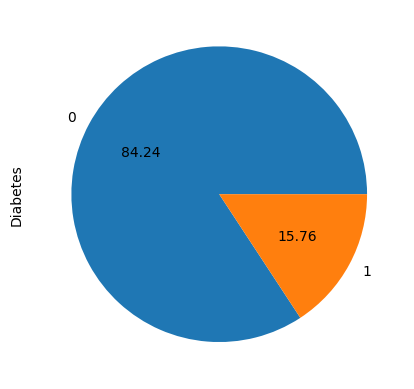

In [11]:
y.value_counts().plot.pie(autopct='%.2f')

## solution to imbalanced dataset 

After combining minority classes, still the ratio of target variable: 'diabetes / no diabetes' is equal to 0.157. 

A dataset that consists of one class is in the majority and if the class has above 90% weightage and another class has less than 10% weightage then the dataset is imbalanced.

That is why we have to make the classes balance. 
This could be done by either undersampling the majority class, or oversampling the minority class. 

Another way is class weighting: This involves assigning different weights to each class, so that the model pays more attention to the minority class and less to the majority class. 

One more solution is model selection: This involves choosing a model that is more robust to imbalanced data, such as decision trees, random forests, gradient boosting, etc. These models can handle imbalanced data better than linear models or neural networks. 

Another way is evaluation metrics: This involves using metrics that are more suitable for imbalanced data, such as precision, recall, F1-score, ROC curve, etc. rather than accuracy, which can be misleading for imbalanced data.

### random undersampling

reduce the majority class to the sames size as the minority class

In [12]:
rus = RandomUnderSampler(sampling_strategy='not minority')

X_rus, y_rus = rus.fit_resample(X, y)

0    39977
1    39977
Name: Diabetes, dtype: int64 



<AxesSubplot: ylabel='Diabetes'>

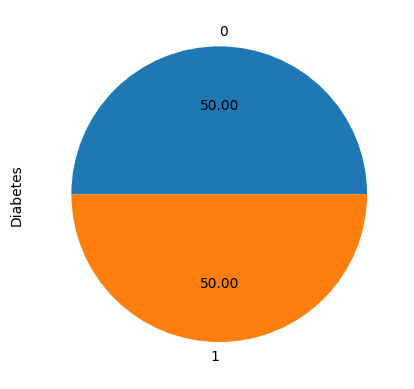

In [13]:
print(y_rus.value_counts(), '\n')
y_rus.value_counts().plot.pie(autopct='%.2f')

### random oversampling

In [14]:
ros = RandomOverSampler(sampling_strategy='not majority')
X_ros, y_ros = ros.fit_resample(X, y)

0    213703
1    213703
Name: Diabetes, dtype: int64 



<AxesSubplot: ylabel='Diabetes'>

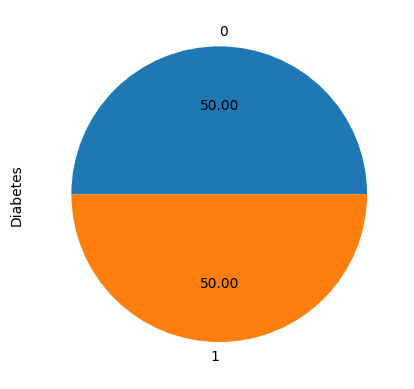

In [15]:
print(y_ros.value_counts(), '\n')
y_ros.value_counts().plot.pie(autopct='%.2f')

Should we drop those features that have zero correlation with target variable? 
Not necessarily. Zero correlation means that there is no linear relationship between the features and the target, but there may be other types of relationships, such as nonlinear, interactive, or conditional. These relationships may not be captured by the simple correlation coefficient, but they may still be useful for predicting the target.

Next is preprocessing the predictors, to normalize the continous variables and one hot vector the categorical variables before feeding the data to the machine learing algorithm. 

### normalize continous features


In [16]:
# split data into tran test set
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=0.3)
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size=0.3)
X_org_train, X_org_test, y_org_train, y_org_test = train_test_split(X, y, test_size=0.3)

In [17]:
continuous_features = ['BMI']

In [18]:
# subtracts the minimum value in the feature and 
# then divides by the range for continous features
scaler_1 = MinMaxScaler()

# normalize the random undersampling data between (0, 1)
X_rus_train[continuous_features] = scaler_1.fit_transform(X_rus_train[continuous_features])
X_rus_test[continuous_features] = scaler_1.transform(X_rus_test[continuous_features])

In [19]:
scaler_2 = MinMaxScaler()

# normalize the random oversampling data between (0, 1)
X_ros_train[continuous_features] = scaler_2.fit_transform(X_ros_train[continuous_features])
X_ros_test[continuous_features] = scaler_2.transform(X_ros_test[continuous_features])

In [20]:
scaler_3 = MinMaxScaler()

# normalize the original data between (0,1)
X_org_train[continuous_features] = scaler_3.fit_transform(X_org_train[continuous_features])
X_org_test[continuous_features] = scaler_3.transform(X_org_test[continuous_features])

### encode categorical features

In [21]:
categorical_features = ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

In [22]:
# one hot encode the categorical features
X_rus_train = pd.get_dummies(X_rus_train, columns=categorical_features, 
                             prefix=categorical_features, drop_first=True)

X_rus_test = pd.get_dummies(X_rus_test, columns=categorical_features, 
                             prefix=categorical_features, drop_first=True)

In [23]:
# one hot encode the categorical features
X_ros_train = pd.get_dummies(X_ros_train, columns=categorical_features, 
                             prefix=categorical_features, drop_first=True)

X_ros_test = pd.get_dummies(X_ros_test, columns=categorical_features, 
                             prefix=categorical_features, drop_first=True)

In [24]:
# one hot encode the categorical features
X_org_train = pd.get_dummies(X_org_train, columns=categorical_features, 
                             prefix=categorical_features, drop_first=True)

X_org_test = pd.get_dummies(X_org_test, columns=categorical_features, 
                             prefix=categorical_features, drop_first=True)

## save to csv

In [26]:
# save random undersampling data
X_rus_train.to_csv('data/rus/X_rus_train.csv', index = False)
X_rus_test.to_csv('data/rus/X_rus_test.csv', index = False)

y_rus_train.to_csv('data/rus/y_rus_train.csv', index = False)
y_rus_test.to_csv('data/rus/y_rus_test.csv', index = False)

In [27]:
# save random oversampling data
X_ros_train.to_csv('data/ros/X_ros_train.csv', index = False)
X_ros_test.to_csv('data/ros/X_ros_test.csv', index = False)

y_ros_train.to_csv('data/ros/y_ros_train.csv', index = False)
y_ros_test.to_csv('data/ros/y_ros_test.csv', index = False)

In [28]:
# save preprocessed original data
X_org_train.to_csv('data/org/X_org_train.csv', index = False)
X_org_test.to_csv('data/org/X_org_test.csv', index = False)

y_org_train.to_csv('data/org/y_org_train.csv', index = False)
y_org_test.to_csv('data/org/y_org_test.csv', index = False)